In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import numpy as np
# import xarray as xr
import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
# from scipy.io import loadmat
from cmocean import cm
import pandas as pd

import pickle
import arrow
#from cartopy import crs, feature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools
import netCDF4 as nc
import glob
from decimal import Decimal

#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11

import warnings
warnings.simplefilter('ignore')

In [7]:
# dimensional conversion variables 

#meshmask
mmk = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
e2t = (mmk['e2t'][0,:,:])
e1t = (mmk['e1t'][0,:,:])
#
e1v = (mmk['e1v'][0,:,:])
e2u = (mmk['e2u'][0,:,:])
surfar_m2 = e1t * e2t
tmask_orig = mmk['tmask'][0,:,:,:]
tmask = (mmk['tmask'][0,:,:,:])

# cut edges
tmask[:,878:898,0:100] = 0
tmask[:,:,0:20] = 0

surfar_m2[878:898,0:100] = 0
surfar_m2[:,0:20] = 0

surfar_m2_broad = np.zeros([40,898,398])

for i in range(0,40):
    surfar_m2_broad[i,:,:] = surfar_m2

surfar_m2_mask = surfar_m2_broad * tmask

#seconds in day
sid = 60*60*24

In [19]:
# dimensional conversion variables 

#meshmask
mmk = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
e2t = (mmk['e2t'][0,:,:])
e1t = (mmk['e1t'][0,:,:])
#
e1v = (mmk['e1v'][0,:,:])
e2u = (mmk['e2u'][0,:,:])
surfar_m2 = e1t * e2t
tmask_orig = mmk['tmask'][0,:,:,:]
tmask = (mmk['tmask'][0,:,:,:])

# cut edges
tmask[:,878:898,0:100] = 0
tmask[:,:,0:20] = 0

surfar_m2[878:898,0:100] = 0
surfar_m2[:,0:20] = 0

surfar_m2_broad = np.zeros([40,898,398])

for i in range(0,40):
    surfar_m2_broad[i,:,:] = surfar_m2

surfar_m2_mask = surfar_m2_broad * tmask

#seconds in day
sid = 60*60*24

masked_surface_area = surfar_m2_mask[0,:,:]

yy = 2017
mm = '01'
dd = '01'

fformatFlow=f'/results/forcing/rivers/R201702DFraCElse_y{yy}m{mm}d{dd}.nc'
w = nc.Dataset(fformatFlow)
runoff_kg_m2_s = (w['rorunoff'][0,:,:])
runoff_kg_s = runoff_kg_m2_s * masked_surface_area
runoff_m3_day = runoff_kg_s * sid * (1/1000) # 1000 kg per m3
tot_runoff_m3_day = np.sum(np.sum(runoff_m3_day))



In [27]:
start ='2017-01-01'
end ='2017-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

#dayslen = 265
runoff_stor_m3_day = np.zeros([365])

for i in range(0,365):

        tdate = arrow_array[i][0]
        #print(tdate)
        yy = tdate.format('YYYY')
        mm = tdate.format('MM')
        dd = tdate.format('DD')
        tdat = (f'y{yy}m{mm}d{dd}')

        fformatFlow=f'/results/forcing/rivers/R201702DFraCElse_{tdat}.nc'
        w = nc.Dataset(fformatFlow)
        runoff_kg_m2_s = (w['rorunoff'][0,:,:])
        runoff_kg_s = runoff_kg_m2_s * masked_surface_area
        runoff_m3_day = runoff_kg_s * sid * (1/1000) # 1000 kg per m3
        #runoff_stor_m3_dayprint(np.shape(runoff_m3_day))
        tot_runoff_m3_day = np.sum(np.sum(runoff_m3_day))
        #print(np.shape(tot_runoff_m3_day))
        runoff_stor_m3_day[i] = tot_runoff_m3_day

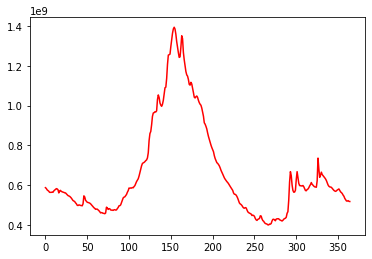

In [26]:
w = plt.plot(runoff_stor_m3_day,'r-')

In [24]:
print(np.shape(runoff_m3_day))

(898, 398)
